In [1]:
# importing the required modules 
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file_path 
file_path="Customer-Churn-Records.csv"
# reading the csv file of the data
df=pd.read_csv(file_path)

In [3]:
# getting the sample data 
df.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9378,9379,15762682,Mitchell,709,Spain,Female,35,1,111827.27,2,1,0,12674.68,0,0,3,DIAMOND,716
5459,5460,15617507,Wilson,530,Spain,Female,36,7,0.00,2,1,0,80619.09,0,0,5,SILVER,761
1633,1634,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0,0,3,GOLD,863
5276,5277,15694852,Arcuri,575,France,Male,29,4,121823.40,2,1,1,50368.87,0,0,4,PLATINUM,435
8086,8087,15774847,Knight,593,France,Male,50,6,171740.69,1,0,0,20893.61,0,0,4,SILVER,602
611,612,15603203,Avdeyeva,650,France,Female,27,6,0.00,2,1,0,1002.39,0,0,1,PLATINUM,789
5279,5280,15731330,Tsui,652,Spain,Female,40,7,100471.34,1,1,1,124550.88,0,0,3,GOLD,840
2605,2606,15620398,Mitchell,635,Spain,Female,34,5,98683.47,2,1,0,15733.19,0,0,3,SILVER,558
6530,6531,15808851,Bufkin,511,Germany,Female,75,9,105609.17,1,0,1,105425.18,0,0,4,DIAMOND,567
9321,9322,15686099,Ruse,563,Spain,Male,61,1,82182.10,1,1,0,106826.92,1,1,1,GOLD,401


In [4]:
# knowing the shape of the data set
print("No.of rows in the Data set: ",df.shape[0])
print("No.of Columns in the Data set :",df.shape[1])
df.shape

No.of rows in the Data set:  10000
No.of Columns in the Data set : 18


(10000, 18)

In [5]:
# information about the data set  i.e about the fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
# feature selection i.e droping the rownumber column
df.drop("RowNumber",axis=1,inplace=True)

In [7]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [8]:
# finding the duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# finding the null values 
df.isna().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# finding the percentage of null values in the data
df_null_stats = pd.DataFrame({
    "columnname": df.columns,
    "null_count": df.isna().sum().values,
    "total_rows": len(df),
    "null_percentage": (df.isna().sum() / len(df) * 100).round(2)
}).reset_index().drop("index",axis=1)
df_null_stats

,columnname,null_count,total_rows,null_percentage
0,CustomerId,0,10000,0.0
1,Surname,0,10000,0.0
2,CreditScore,0,10000,0.0
3,Geography,0,10000,0.0
4,Gender,0,10000,0.0
5,Age,0,10000,0.0
6,Tenure,0,10000,0.0
7,Balance,0,10000,0.0
8,NumOfProducts,0,10000,0.0
9,HasCrCard,0,10000,0.0


**Since there are no missing values in the dataset, we can confidently proceed with analysis, knowing the data is clean, accurate, and reliable.**

In [11]:
# finding the name having any other charaters other than alphabet
df[df["Surname"].str.contains("[^A-Za-z]")]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342
52,15683553,O'Brien,788,France,Female,33,5,0.00,2,0,0,116978.19,0,0,3,GOLD,982
58,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1,1,5,SILVER,549
109,15744689,T'ang,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1,1,3,DIAMOND,328
183,15810845,T'ang,636,France,Male,42,2,0.00,2,1,1,55470.78,0,0,4,PLATINUM,991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,15657771,Ts'ui,537,France,Male,37,6,0.00,1,1,1,17802.42,0,0,2,PLATINUM,336
9966,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,0,5,SILVER,555
9972,15747927,Ch'in,758,France,Male,26,4,155739.76,1,1,0,171552.02,0,0,5,SILVER,757
9978,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,1,0,1,GOLD,354


In [12]:
# function to validate the surname to avoid any other charcters rather than  alphabets
def name_validation(name):
        return name if any(not c.isalpha() for c in name) else None

In [13]:
# using the function to validate 
df["Surname"].apply(lambda x: name_validation(x)).unique()

array([None, 'H?', "O'Brien", "T'ien", "T'ang", "T'ao", "Ch'ien",
       "O'Sullivan", "Ch'iu", "K'ung", "O'Donnell", "Ts'ai", 'L?',
       'De Salis', 'Hs?', "Ch'en", 'De Luca', 'Wentworth-Shields',
       "Ts'ao", "Ch'ang", "P'an", "Ts'ui", "P'eng", "Ch'eng", "O'Loghlen",
       'Y?an', "Ch'in", 'Li Fonti', 'Winter-Irving', "O'Neill",
       'Drake-Brockman', "T'an", 'K?', "D'Albertis", 'Le Grand', 'Y?',
       "O'Meara", "O'Toole", 'Lo Duca', 'Collingridge de Tourcey',
       'Le Gallienne', 'De Bernales', "O'Connor", 'Warlow-Davies',
       'De Garis', 'Hs?eh', 'Du Cane', 'De Neeve', 'To Rot',
       'Hughes-Jones', 'Cumbrae-Stewart', 'Radcliffe-Brown',
       'Edmund la Touche', 'Parry-Okeden', "O'Loughlin", 'Ross-Watt',
       'Fleetwood-Smith', 'Barclay-Harvey', 'Le Hunte', "O'Loghlin",
       "O'Callaghan", 'Ah Mouy', 'Howell-Price', 'St Clair', 'Von Doussa',
       'De Mestre', 'Marshall-Hall', 'Hayes-Williams', "O'Kane"],
      dtype=object)

In [14]:
# function to clean the surname i.e only extraction of alpha charters from the name
def clean_surname(name):
    return "".join([ c for c in name if c.lower()>="a" and c.lower()<="z"])

In [15]:
# storing the cleaned name
df["Cleaned_surname"]=df["Surname"].apply(lambda x : clean_surname(x))

In [16]:
# validating the cleaned name 
df["Cleaned_surname"].apply(lambda x: name_validation(x)).unique()

array([None], dtype=object)

In [17]:
# finding the unique values
columns=["Geography","Gender","Card Type"]
for column in columns:
    print(df[column].value_counts())
    print("*"*20)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
********************
Gender
Male      5457
Female    4543
Name: count, dtype: int64
********************
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
********************


In [18]:
chunk_dist=df["Exited"].value_counts().reset_index()

In [19]:
chunk_dist["Exited"]=chunk_dist["Exited"].map(lambda x: "Churned" if x==1 else "Non-Churned" )

In [20]:
chunk_dist

,Exited,count
0,Non-Churned,7962
1,Churned,2038


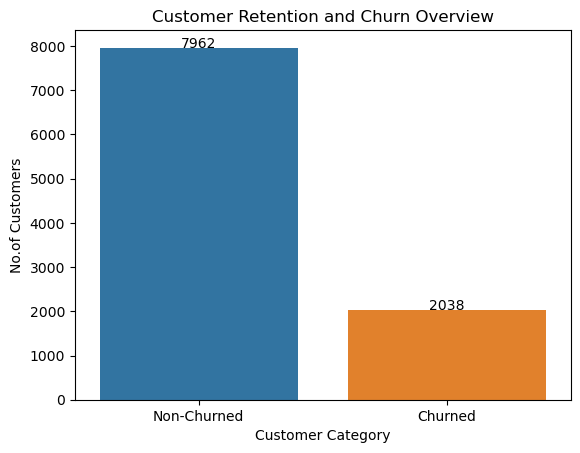

In [21]:
# distribution of churned vs. non-churned/retained customers
ax=sns.barplot(chunk_dist,x="Exited",y="count",hue="Exited")
plt.xlabel("Customer Category")
plt.ylabel("No.of Customers")
plt.title("Customer Retention and Churn Overview")
# adding labels for the bars
for p in ax.patches:
    height=p.get_height()
    ax.text(
                p.get_x()+p.get_width()/2.,
                height+5,
                f'{int(height)}',
                ha='center'      
            
        )
plt.show()

Looking at our customer base, the majority are staying with us — nearly 8 out of 10 customers (79.62%) are non-chunked/retained. This suggests our engagement and service efforts are working well. On the other hand, about 1 in 5 customers (20.38%) have churned, highlighting an opportunity to focus on retention programs, understand their concerns, and reduce churn in the future

In [22]:
df.groupby(by="Exited")["EstimatedSalary"].mean()

Exited
0     99726.853141
1    101509.908783
Name: EstimatedSalary, dtype: float64

In [23]:
# distribution of EstimatedSalary of churned and retained Customers
df[df["Exited"]==1]["EstimatedSalary"]

0       101348.88
2       113931.57
5       149756.71
7       119346.88
16        5097.67
          ...    
9981     53445.17
9982    115146.40
9991     69384.71
9997     42085.58
9998     92888.52
Name: EstimatedSalary, Length: 2038, dtype: float64

In [24]:
df[df["Exited"]==0]["EstimatedSalary"]

1       112542.58
3        93826.63
4        79084.10
6        10062.80
8        74940.50
          ...    
9993     29179.52
9994    167773.55
9995     96270.64
9996    101699.77
9999     38190.78
Name: EstimatedSalary, Length: 7962, dtype: float64

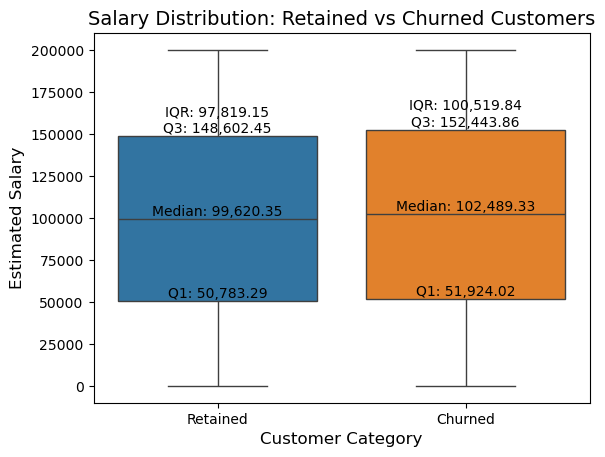

In [41]:
ax=sns.boxplot(df,x="Exited",y="EstimatedSalary",hue="Exited",legend=False)
stats=df.groupby("Exited")["EstimatedSalary"].describe()
for idx, status in enumerate(stats.index):
    q1=stats.loc[status,"25%"]
    median=stats.loc[status,"50%"]
    q3=stats.loc[status,"75%"]
    iqr=q3-q1
    # Annotate Q1
    ax.text(idx, q1, f"Q1: {q1:,.2f}", ha="center", va="bottom")
    # Annotate Median
    ax.text(idx, median, f"Median: {median:,.2f}", ha="center", va="bottom")
    # Annotate Q3
    ax.text(idx, q3, f"Q3: {q3:,.2f}", ha="center", va="bottom")
    # Annotate IQR above the box
    ax.text(idx, q3 + 10000, f"IQR: {iqr:,.2f}", ha="center", va="bottom")
plt.xlabel("Customer Category",fontsize=12)
plt.xticks([0,1],["Retained","Churned"])
plt.ylabel("Estimated Salary",fontsize=12)
plt.title("Salary Distribution: Retained vs Churned Customers",fontsize=14)
plt.show()

Analysis of the Estimated Salary distribution reveals that the majority of customers 79.26% are retained, while only 20.38% have churned. Retained customers have a median salary of (99,620.35) with an interquartile range (IQR) of (97,819.15), indicating moderate salary consistency. Churned customers, however, show a slightly higher median (102,489.33) and a wider IQR (100,519.84), reflecting greater variability in their salaries. Although the overall salary ranges and standard deviations are similar across both groups, the slightly higher median and variability among churned customers suggest that higher-earning customers are marginally more prone to churn. These insights indicate that salary alone is not the primary driver of churn, but targeting higher-earning, more variable segments with tailored retention strategies could improve overall customer retention

In [26]:
# How do churn rates vary by Gender, Geography, and IsActiveMember? 
categories = ['Gender', 'Geography', 'IsActiveMember']
churn_summary=pd.concat({
    col: df.groupby(col)["Exited"].mean() for col in categories
    },axis=0).reset_index().rename(columns={"level_0":"Category","level_1":"Group","Exited":"ChurnRate%"})
churn_summary["ChurnRate%"]=(churn_summary["ChurnRate%"]*100).round(2)
mask = churn_summary['Category']=='IsActiveMember'
churn_summary.loc[mask, 'Group'] = churn_summary.loc[mask, 'Group'].map({0:'Inactive', 1:'Active'})
churn_summary

,Category,Group,ChurnRate%
0,Gender,Female,25.07
1,Gender,Male,16.47
2,Geography,France,16.17
3,Geography,Germany,32.44
4,Geography,Spain,16.67
5,IsActiveMember,Inactive,26.87
6,IsActiveMember,Active,14.27


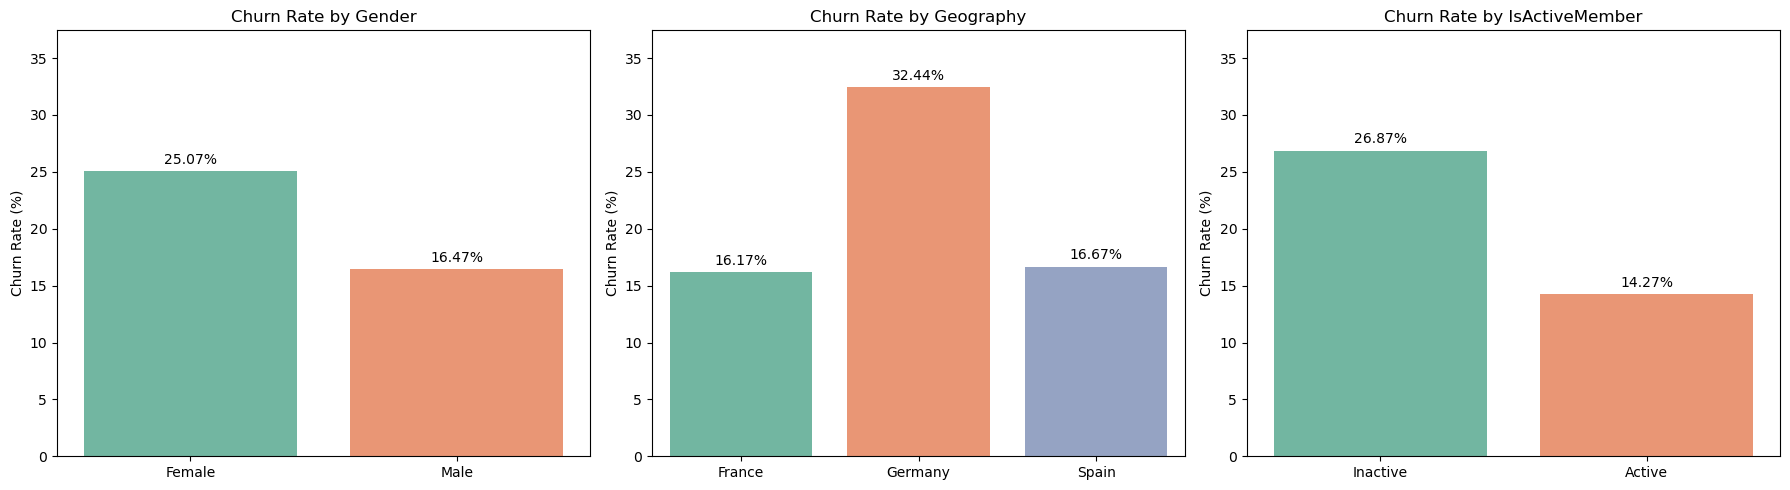

In [27]:
# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # width 18, height 5

for i, cat in enumerate(categories):
    ax = axes[i]
    data = churn_summary[churn_summary['Category']==cat]
    
    sns.barplot(data=data, x='Group', y='ChurnRate%', ax=ax,hue='Group',legend=False,palette='Set2')
    ax.set_title(f'Churn Rate by {cat}')
    ax.set_ylabel('Churn Rate (%)')
    ax.set_ylim(0, churn_summary['ChurnRate%'].max() + 5)
    ax.set_xlabel('')  # optional: remove x-label to look cleaner
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Gender:**
Among our customers, female customers are more likely to churn than male customers. Approximately 25 out of every 100 female customers are leaving, compared to 16 out of every 100 male customers. This indicates that female customers are 1.5 times more likely to churn than male customers, highlighting a need for targeted engagement strategies to retain them.

**Geography:**
Churn varies significantly by region. Customers in Germany have the highest churn rate, with around 32 out of every 100 customers leaving, followed by Spain 17 out of 100 and France 16 out of 100. This suggests that regional factors may be driving customer attrition in Germany, and a deeper investigation into local customer satisfaction, service experience, or competitive pressures is warranted.

**Membership Activity (IsActiveMember):**
Customer activity status strongly impacts churn. Inactive members are leaving at a rate of approximately 27 out of every 100 customers, whereas active members churn at a much lower rate of 14 out of every 100. This shows that inactive customers are almost twice as likely to churn as active ones, underlining the importance of re-engagement campaigns and personalized retention strategies for this group

In [28]:
#. What is the average CreditScore, Balance, and EstimatedSalary of churned vs. retained customers? 
metrics = ['CreditScore', 'Balance', 'EstimatedSalary']
avg_churn_summary = df.groupby("Exited")[metrics].mean().reset_index()
avg_churn_summary["Exited"] = avg_churn_summary["Exited"].replace({0:"Retained",1:"Churned"})
avg_churn_summary = avg_churn_summary.melt(id_vars="Exited", var_name="Category", value_name="Average")
avg_churn_summary

,Exited,Category,Average
0,Retained,CreditScore,651.837855
1,Churned,CreditScore,645.414622
2,Retained,Balance,72742.750663
3,Churned,Balance,91109.476006
4,Retained,EstimatedSalary,99726.853141
5,Churned,EstimatedSalary,101509.908783


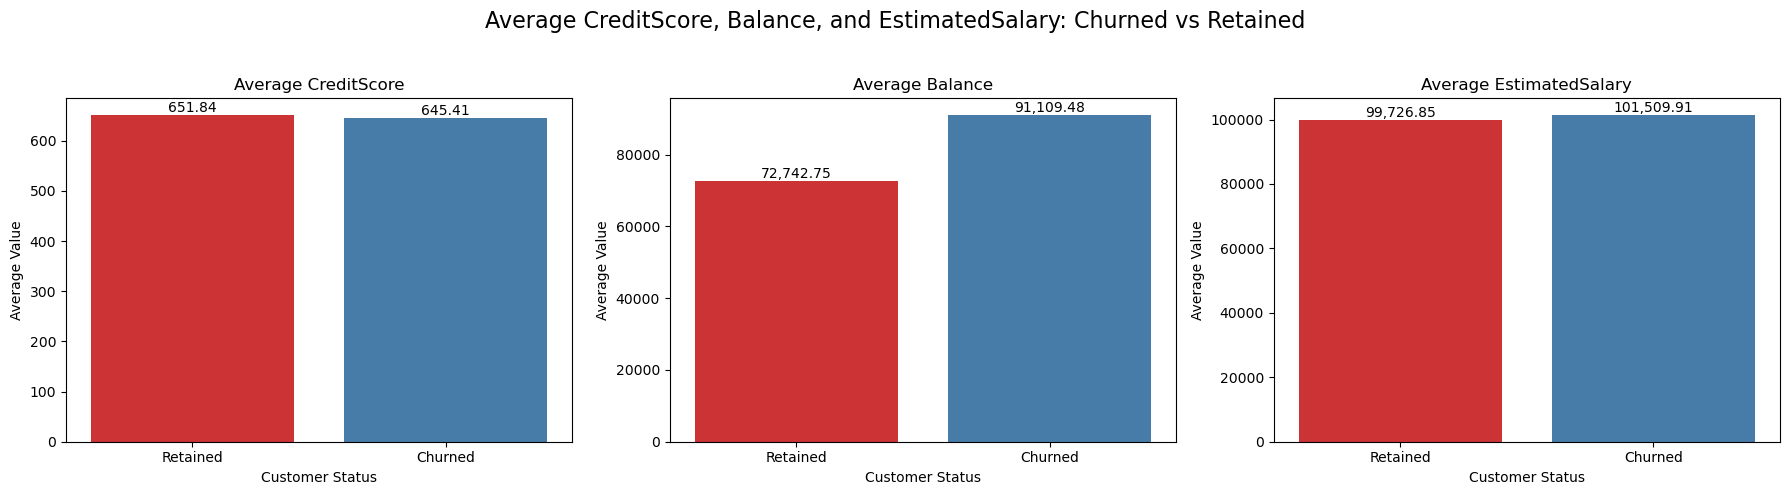

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, metric in enumerate(metrics):
    data = avg_churn_summary[avg_churn_summary['Category'] == metric]
    
    sns.barplot(data=data, x='Exited', y='Average',hue="Exited",legend=False, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Average {metric}')
    axes[i].set_ylabel('Average Value')
    axes[i].set_xlabel('Customer Status')
    
    # Annotate bars with proper formatting
    for p in axes[i].patches:
        height = p.get_height()
        # Format Balance and EstimatedSalary with comma for thousands
        if metric in ['Balance', 'EstimatedSalary']:
            label = f'{height:,.2f}'
        else:
            label = f'{height:.2f}'
        axes[i].annotate(label,
                         (p.get_x() + p.get_width()/2., height),
                         ha='center', va='bottom', fontsize=10)

plt.suptitle('Average CreditScore, Balance, and EstimatedSalary: Churned vs Retained', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

**Credit Score**

Customers who churn have a slightly lower average credit score 645 compared to retained customers 652. Although the difference is small, it suggests that customers with lower financial confidence or stability may feel less supported or secure in their relationship with the company.
**Business Insight:** Focus on understanding the financial challenges of this segment and provide credit-friendly plans, flexible repayment options, or personalized guidance to increase their confidence and engagement.

**Balance**

Churned customers tend to maintain higher account balances 91k than retained customers 73k. This indicates that even financially strong customers may feel overlooked if their needs are not acknowledged or rewarded.
**Business Insight:** Strengthen emotional and service connections with this valuable segment through priority support, personalized communication, and loyalty recognition programs to enhance satisfaction and retention.

**Estimated Salary**

Churned customers have a slightly higher estimated salary 101k compared to retained customers 99k. While income alone does not directly influence churn, higher-earning customers often expect more personalized attention, convenience, and value.
**Business Insight:** Introduce premium experiences, proactive engagement, and exclusive benefits to meet expectations and foster a sense of partnership, rather than just a transactional relationship.

In [30]:
df.groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7962.0,37.408063,10.125957,18.0,31.0,36.0,41.0,92.0
1,2038.0,44.835623,9.759754,18.0,38.0,45.0,51.0,84.0


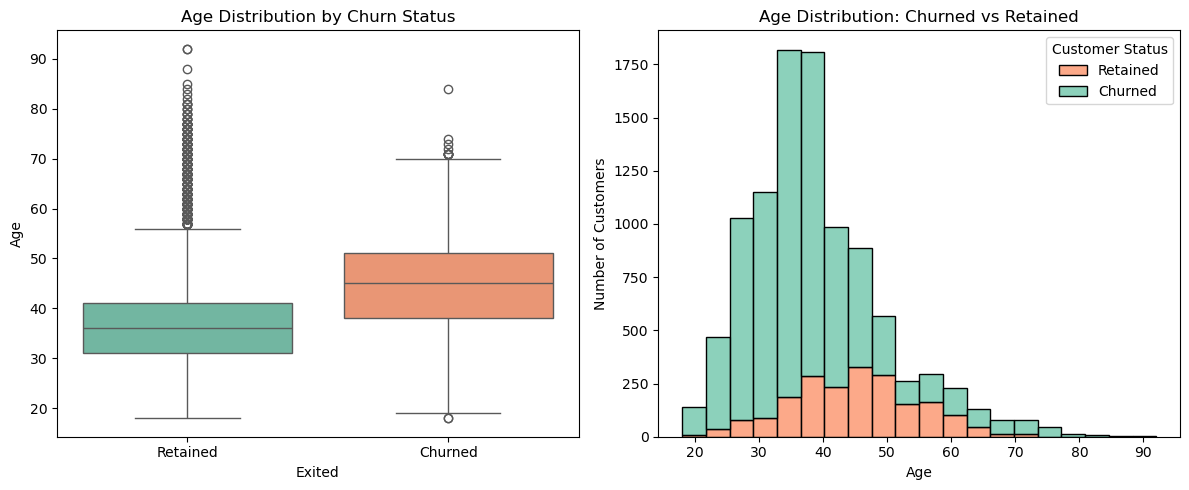

In [31]:
#. How does Age impact churn? Plot histograms and boxplots for churned and non-churned groups.
plt.figure(figsize=(12,5))
# Boxplot
plt.subplot(1,2,1)
sns.boxplot(data=df, x="Exited", y="Age", hue="Exited",legend=False,palette="Set2")
plt.xticks([0,1], ["Retained", "Churned"])
plt.title("Age Distribution by Churn Status")

# Histogram
plt.subplot(1,2,2)
sns.histplot(data=df, x="Age", hue="Exited", bins=20, multiple="stack", palette="Set2")
plt.title("Age Distribution: Churned vs Retained")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Status", labels=["Retained", "Churned"])

plt.tight_layout()
plt.show()


**Boxplot Insights**
Median age of churned customers is ~45 years, compared to ~35 years for retained customers.
The churned group shows greater variability, spanning a wider range of ages (38–52), while retained customers are mostly concentrated between 30–40 years.
Outliers exist in both groups, particularly among retained customers, indicating some very young or very old customers deviate from the typical age.
**Interpretation:**
Older customers are more likely to churn, and churn occurs across a broader set of age brackets rather than a single age group

**Histogram / KDE Insights**
Retained customers (peak between 30–40 years) are mostly younger, showing a sharp concentration.
Churned customers are flatter, centered around 40–50 years, indicating fewer but older customers leaving.
Some overlap occurs between 35–45 years, showing that middle-aged customers may both stay or leave.
Very few churned customers are under 30, suggesting younger customers are more stable.
**Interpretation:**
The average age of churned customers is higher, and churn is distributed across multiple older age groups. This confirms a positive correlation between age and churn probability.

In [32]:
# To describe how age impacts on the churn
from scipy import stats
# Split into two groups
age_retained = df[df['Exited'] == 0]['Age']
age_churned = df[df['Exited'] == 1]['Age']

# Perform an independent two-sample t-test
t_stat, p_val = stats.ttest_ind(age_churned, age_retained, equal_var=False)

print("T-statistic:", round(t_stat, 2))
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference in age between churned and retained customers.")
else:
    print("No significant difference in age between churned and retained customers.")

T-statistic: 30.42
P-value: 4.399451965599354e-179
Significant difference in age between churned and retained customers.


**Statistical Confirmation**
A two-sample t-test shows p < 0.05, confirming that the age difference between churned and retained customers is statistically significant.

In predictive terms, Age would have a positive coefficient, meaning that as age increases, the likelihood of churn also increases.

**Business Insight**
Older customers are at higher risk of churn.
Retention strategies should focus on middle-aged to older segments, for example:
Personalized engagement and loyalty programs
Tailored communication highlighting value and benefits
Special offers or services addressing their specific needs

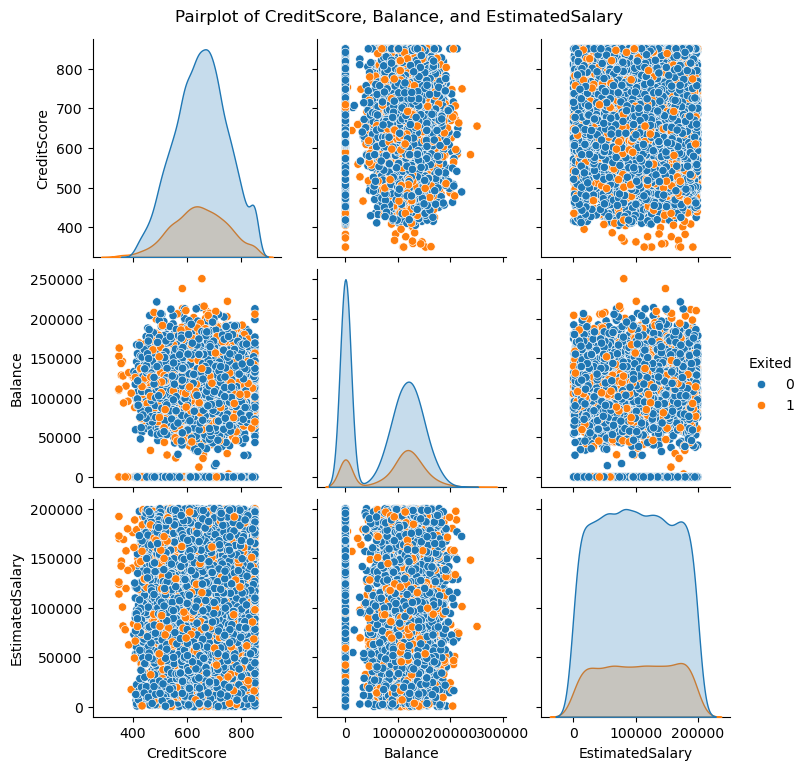

In [48]:
#. Is there any correlation among numeric features like CreditScore, Balance, and EstimatedSalary?
sns.pairplot(data=df,vars=["CreditScore","Balance","EstimatedSalary"],hue="Exited")
plt.suptitle("Pairplot of CreditScore, Balance, and EstimatedSalary", y=1.02)
plt.show()

**Observation:** Pairplot shows that CreditScore, Balance, and EstimatedSalary are mostly scattered, with no clear patterns or trends between them.

**Interpretation:** There is no strong correlation among these numeric features. Each variable alone shows slight differences between churned and retained customers, but none clearly separates the two groups.

**Business Insight:** Financial features alone are not enough to predict churn. Focus should also include demographics, membership activity, and engagement patterns to identify high-risk customers.

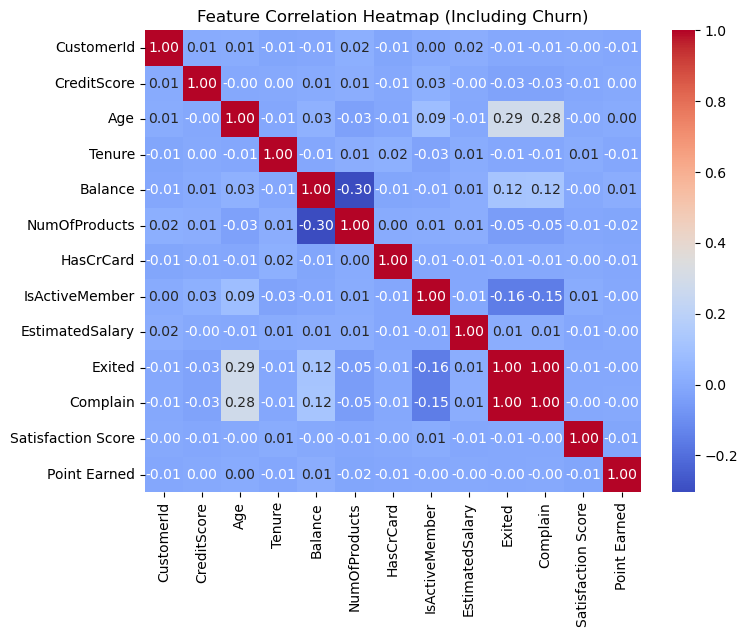

In [34]:
# What does a heatmap reveal about feature interactions with churn 
numeric_df = df.select_dtypes(include="number")

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Including Churn)")
plt.show()

**High Risk Indicators:**
Complain: Customers who complain are very likely to churn.

Age: Older customers show a slightly higher tendency to leave.

**Protective Factors:**
IsActiveMember: Active members are less likely to churn.

NumOfProducts: Customers with more products tend to stay longer.

**Minimal Impact:**
CreditScore, Balance, EstimatedSalary, Tenure, HasCrCard show little direct correlation with churn.

**Business Takeaway:**
Resolve complaints quickly to retain customers.
Engage older customers with tailored services.
Encourage active membership and cross-sell products to reduce churn.
Combine financial, demographic, and behavioral features for effective retention strategies.

**Note:**
**Complain** has high multicollinearity with **Exited**; consider keeping one to avoid redundancy in predictive models.

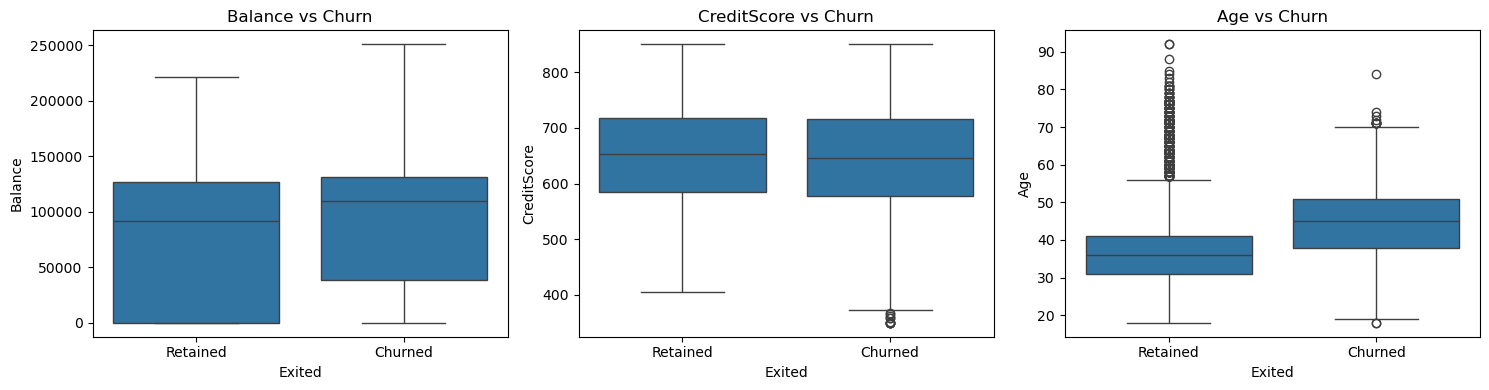

In [35]:
# Are there outliers in Balance, CreditScore, or Age that are mostly associated with churn?
features = ["Balance", "CreditScore", "Age"]
plt.figure(figsize=(15,4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Exited", y=col)
    plt.title(f"{col} vs Churn")
    plt.xticks([0,1], ["Retained", "Churned"])
plt.tight_layout()
plt.show()

**Balance**
Observation: Numerous outliers exist at the high end (≈ $200,000–$250,000) for both retained and churned customers.

Insight: These high balances are not concentrated among churned customers, suggesting that having a very high balance alone does not increase churn risk.

**CreditScore**
Observation: Few outliers appear at the low end of the credit score spectrum, for both retained and churned customers (some scores < 400).

Insight: Extremely low credit scores are not exclusive to churned customers. While low scores may indicate financial vulnerability, they do not strongly predict churn on their own.

**Age**
Observation: Outliers are prominent among older customers in the churned group, with some ages reaching up to 85 years. The median age of churned customers is already higher than that of retained customers.

**Key Takeaways**

Insight: Older age outliers are strongly associated with churn. This reinforces that age is a significant factor, and customers at the extreme upper age spectrum are most likely to exit.

Balance & CreditScore: High balances or extremely low credit scores alone are not strong churn indicators, so retention efforts should focus on other behavioral or engagement factors.

Age: Target older customers, particularly those at the extreme age end, with personalized engagement and support, as they are at higher risk of leaving

In [36]:
# Group customers into age brackets (e.g.,18-30 as Adults, 30-50 as middle age and 50-100 as seniors.). How does churn rate change across them? 
bins=[18,30,50,100]
labels=["Adults","Middle Age","Seniors"]
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels,right=True)

In [37]:
age_churn=df.groupby("AgeGroup",observed=True)["Exited"].mean().reset_index()
age_churn["Exited"]=(age_churn["Exited"]*100).round(2)
age_churn.rename(columns={"Exited": "ChurnRate%"}, inplace=True)
age_churn

,AgeGroup,ChurnRate%
0,Adults,7.50
1,Middle Age,19.60
2,Seniors,44.65


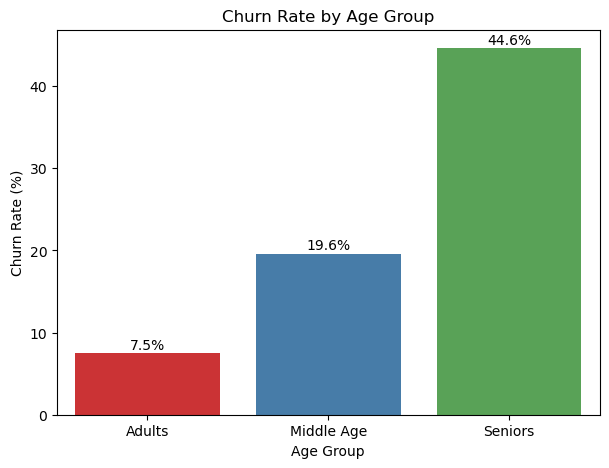

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(data=age_churn, x='AgeGroup', y='ChurnRate%',hue="AgeGroup",legend=False, palette='Set1')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')

# Add labels on bars
for i, row in age_churn.iterrows():
    plt.text(i, row['ChurnRate%']+0.5, f"{row['ChurnRate%']:.1f}%", ha='center')

plt.show()

**Churn increases sharply with age. Focusing retention strategies on older customers can have the highest impact on reducing overall churn**

In [39]:
# Create a new column to separate single vs multiple products
#Are customers with only one product (NumOfProducts = 1) more likely to churn than those with multiple?
df1=df.copy()
df1['ProductType'] = df1['NumOfProducts'].apply(lambda x: 'Single Product' if x==1 else 'Multiple Products')

# Churn rate for Single vs Multiple
churn_by_product_type = df1.groupby('ProductType')['Exited'].mean().reset_index()
churn_by_product_type['ChurnRate%'] = churn_by_product_type['Exited']*100
churn_by_product_type = churn_by_product_type.drop(columns='Exited')
churn_by_product_type


,ProductType,ChurnRate%
0,Multiple Products,12.794955
1,Single Product,27.714398


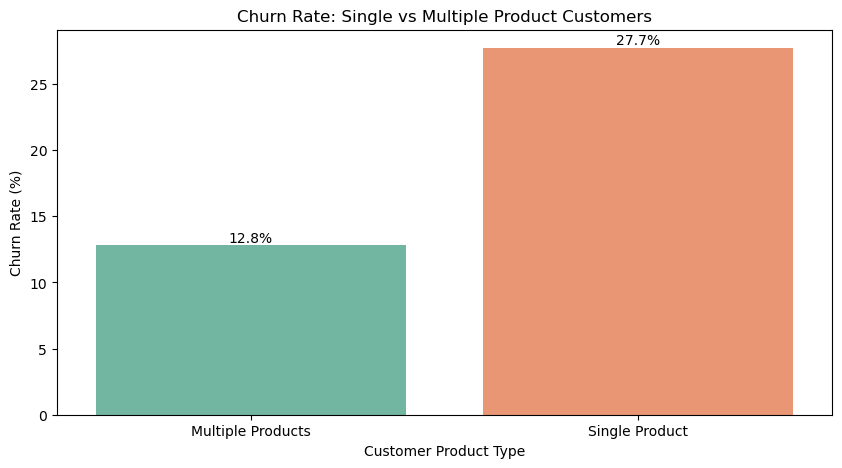

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=churn_by_product_type, x='ProductType', y='ChurnRate%',hue="ProductType",legend=False, palette='Set2')
plt.title('Churn Rate: Single vs Multiple Product Customers')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Customer Product Type')

# Add labels on bars
for i, row in churn_by_product_type.iterrows():
    plt.text(i, row['ChurnRate%']+0.25, f"{row['ChurnRate%']:.1f}%", ha='center')

plt.show()

**Insights:**

Single Product Customers: Churn rate is 27.7%, more than double that of multiple-product customers. These customers are less engaged and at higher risk of leaving.

Multiple Product Customers: Churn rate is 12.8%, indicating higher loyalty and retention.

**Business Takeaways:**

Cross-sell strategies: Encourage single-product customers to adopt additional products.

Retention programs: Target single-product customers with personalized offers, rewards, or loyalty incentives.

Focus on high-value retention: Multiple-product customers are already loyal; maintain engagement to sustain low churn.